In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
class DLA:
    def __init__(self, N, L):
        self.seeds = [{'x':0, 'y':0}]
        self.walkers = [{'x':0, 'y':0, 'd':0} for k in range(N-1)]
        for n in range(N-1):
            s = rd.random() * 2 * np.pi
            self.walkers[n]['x'] = int(L * np.cos(s))
            self.walkers[n]['y'] = int(L * np.sin(s))
            self.walkers[n]['d'] = abs(self.walkers[n]['x']) + abs(self.walkers[n]['y'])

    def evolve(self):
        for walker in self.walkers:
            c = rd.randrange(0,4)
            if c == 0:
                walker['x'] += 1
            elif c == 1:
                walker['x'] -= 1
            elif c == 2:
                walker['y'] += 1
            else:
                walker['y'] -= 1

            x, y = walker['x'], walker['y']
            walker['d'] = min([abs(x - seed['x']) + abs(y - seed['y']) for seed in self.seeds])

        for n,walker in enumerate(self.walkers):
            if walker['d'] == 1:
                self.seeds.append({'x':walker['x'], 'y':walker['y']})
                self.walkers.pop(n)

    def plot_all(self):
        fig = plt.figure(figsize=(6,6))
        X = [p['x'] for p in self.seeds]
        Y = [p['y'] for p in self.seeds]
        X2 = [p['x'] for p in self.walkers]
        Y2 = [p['y'] for p in self.walkers]
        plt.plot(X, Y, '.')
        plt.plot(X2, Y2, '.')

    def plot_seeds(self):
        fig = plt.figure(figsize=(6,6))
        X = [p['x'] for p in self.seeds]
        Y = [p['y'] for p in self.seeds]
        plt.plot(X, Y, '.')

In [3]:
N = 6000
L = 40
a = DLA(N, L)

Walkerの数が半分になるまで計算

In [4]:
%%time
k = 0
while len(a.walkers) > N/2:
    a.evolve()
    print('\r\r', len(a.walkers), end='')

 2961Wall time: 1min 52s


seed粒子を描画

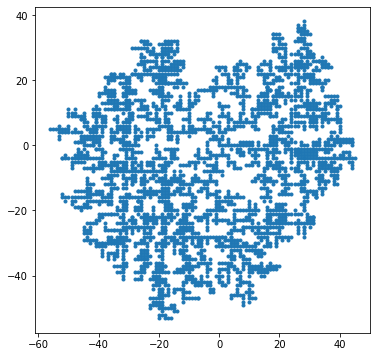

In [5]:
a.plot_seeds()

すべての粒子を描画

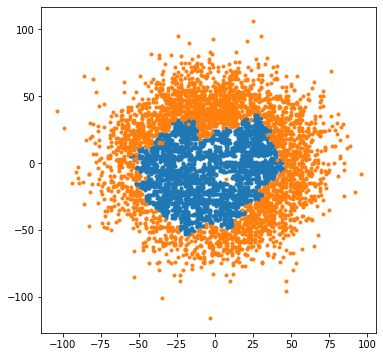

In [6]:
a.plot_all()